In [1]:
# Import libraries and settings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (12, 12)
matplotlib.rcParams.update({'font.size': 24})
from matplotlib.ticker import MaxNLocator
import seaborn as sns

# Import data and rename column
cc_data = pd.read_excel('cc_data_uci.xls')
cc_data.rename(columns={'default payment next month': 'OUTPUT'}, inplace = True)
# Separate inputs: X and output:y
X = cc_data.drop(['OUTPUT'], axis = 1)
y = cc_data['OUTPUT']

# Split in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2/3, random_state=0)

In [4]:
# Initiate some parameters that I want to track in the iteration below
max_depth_range = range(1, 7)
estimator_max_depth = []
accuracy_normalized = []
auc_train           = []
auc_test            = []

for i in max_depth_range:
    # Define and fit
    estimator_max_depth.append(DecisionTreeClassifier(random_state=0, max_depth = i))
    estimator_max_depth[i-1].fit(X_train, y_train)
    # Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    scores_train = estimator_max_depth[i-1].predict_proba(X_train)[:,1] 
    scores_test  = estimator_max_depth[i-1].predict_proba(X_test)[:,1]  
    # Predict the class of test set
    y_test_predicted = estimator_max_depth[i-1].predict(X_test)
    # Calculate accuracy at every iteration and append
    accuracy_normalized.append(100*accuracy_score(y_test, y_test_predicted, normalize = True))
    # ROC Calc Train set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_train, tpr_train, _ = roc_curve(y_train, scores_train)
    # ROC Calc Test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
    # Calculate the AUCs
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))
    

In [5]:
performance_dictionary = {'ACCURACY': accuracy_normalized, 
                          'AUC_TRAIN': auc_train,
                          'AUC_TEST': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['MAX_DEPTH'] = performance_df.index + 1
performance_df

,ACCURACY,AUC_TRAIN,AUC_TEST,MAX_DEPTH
0,82.390,0.637351,0.646862,1
1,82.390,0.689693,0.695848,2
2,82.380,0.738039,0.731640,3
3,82.355,0.755844,0.743888,4
4,81.950,0.771776,0.745124,5
5,81.920,0.784800,0.745417,6


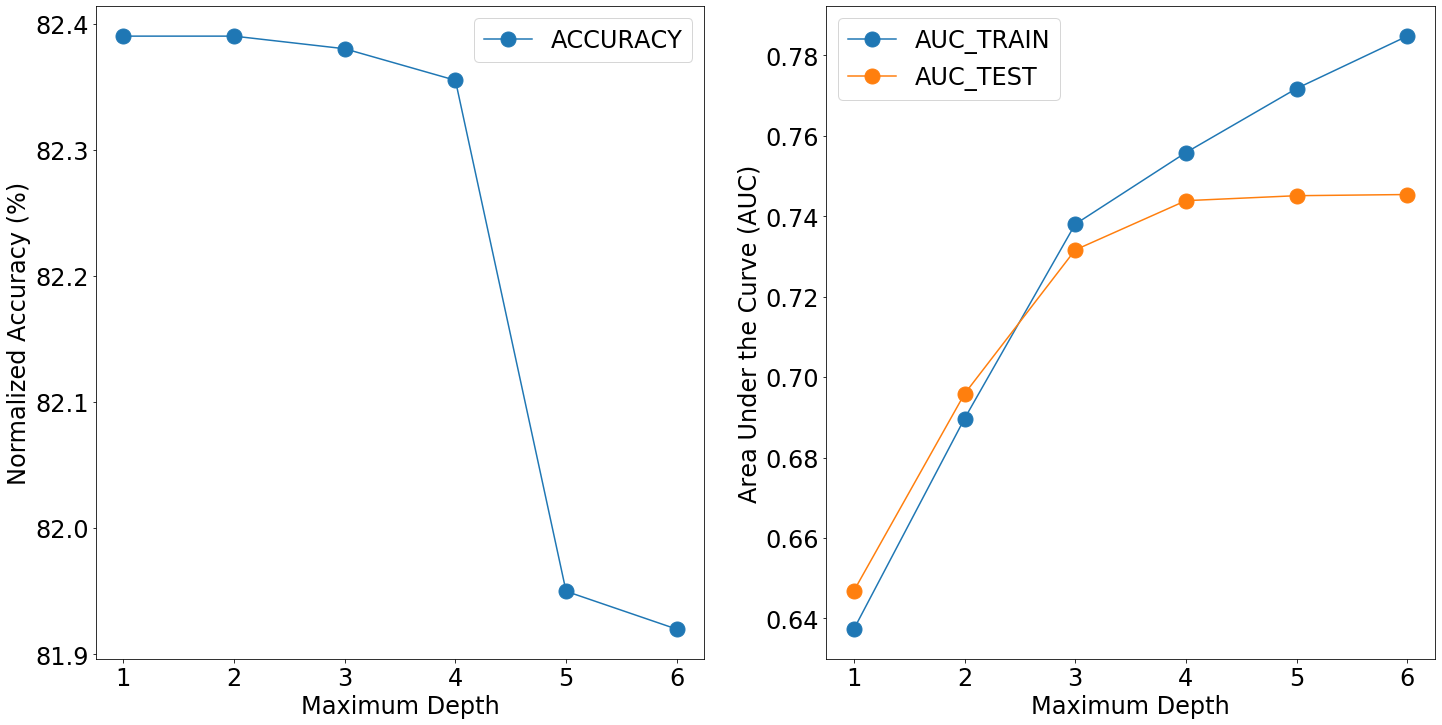

In [7]:
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
ax1 = performance_df.plot(x = 'MAX_DEPTH', y = 'ACCURACY', ax = fig_1_a, style = 'o-', markersize =15)
ax1.set_ylabel("Normalized Accuracy (%)")
ax1.set_xlabel("Maximum Depth")

fig_1_b = plt.subplot(122)
ax2 = performance_df.plot(x = 'MAX_DEPTH', y = 'AUC_TRAIN', ax = fig_1_b, style = 'o-', markersize =15)
ax2 = performance_df.plot(x = 'MAX_DEPTH', y = 'AUC_TEST', ax = fig_1_b, style = 'o-', markersize =15)
ax2.set_xlabel("Maximum Depth")
ax2.set_ylabel("Area Under the Curve (AUC)")
# ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()